In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import geom
from scipy.stats import uniform
from scipy.stats import poisson

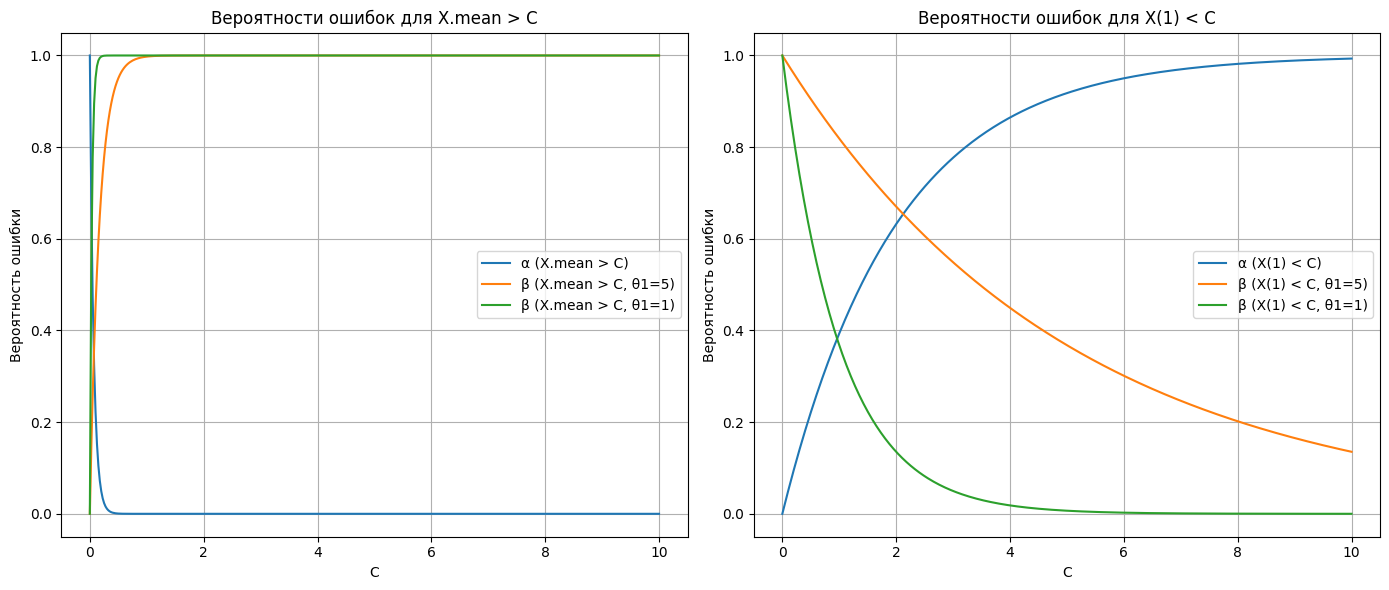

In [3]:
#2.1
# Параметры
theta0 = 2
theta1_1 = 5
theta1_2 = 1
n = 30  # размер выборки
C_values = np.linspace(0, 10, 400)

# Ошибка первого рода и второго рода для критерия {X.mean > C}
alpha_mean = [1 - expon.cdf(C, scale=theta0/n) for C in C_values]
beta_mean_1 = [expon.cdf(C, scale=theta1_1/n) for C in C_values]
beta_mean_2 = [expon.cdf(C, scale=theta1_2/n) for C in C_values]

# Ошибка первого рода и второго рода для критерия {X(1) < C}
alpha_min = [expon.cdf(C, scale=theta0) for C in C_values]
beta_min_1 = [1 - expon.cdf(C, scale=theta1_1) for C in C_values]
beta_min_2 = [1 - expon.cdf(C, scale=theta1_2) for C in C_values]

# Построение графиков
plt.figure(figsize=(14, 6))

# График для {X.mean > C}
plt.subplot(1, 2, 1)
plt.plot(C_values, alpha_mean, label='α (X.mean > C)')
plt.plot(C_values, beta_mean_1, label='β (X.mean > C, θ1=5)')
plt.plot(C_values, beta_mean_2, label='β (X.mean > C, θ1=1)')
plt.xlabel('C')
plt.ylabel('Вероятность ошибки')
plt.title('Вероятности ошибок для X.mean > C')
plt.legend()
plt.grid(True)

# График для {X(1) < C}
plt.subplot(1, 2, 2)
plt.plot(C_values, alpha_min, label='α (X(1) < C)')
plt.plot(C_values, beta_min_1, label='β (X(1) < C, θ1=5)')
plt.plot(C_values, beta_min_2, label='β (X(1) < C, θ1=1)')
plt.xlabel('C')
plt.ylabel('Вероятность ошибки')
plt.title('Вероятности ошибок для X(1) < C')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

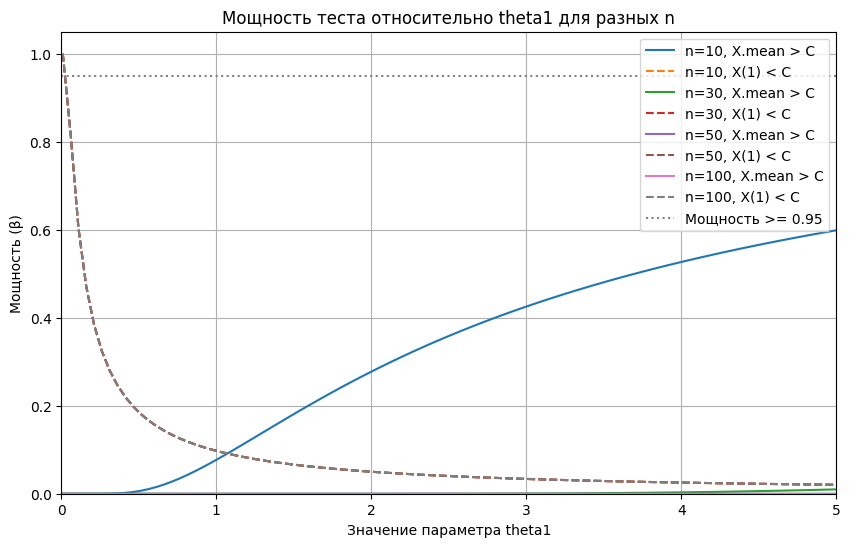

In [7]:
#2.2
# Параметры
theta0 = 2
theta1_range = np.linspace(0.01, 5, 100)
n_values = [10, 30, 50, 100]  # Размеры выборки

# Находим значение C для alpha=0.05
alpha = 0.05
C_mean_alpha = -1 / (theta0 / np.array(n_values)) * np.log(1 - alpha)
C_min_alpha = expon.ppf(alpha, scale=theta0)

# Графики мощности
plt.figure(figsize=(10, 6))

for n, C_mean, C_min in zip(n_values, C_mean_alpha, [C_min_alpha]*len(n_values)):
    power_mean = [1 - expon.cdf(C_mean, scale=theta1 / n) for theta1 in theta1_range]
    power_min = [expon.cdf(C_min, scale=theta1) for theta1 in theta1_range]
    plt.plot(theta1_range, power_mean, label=f'n={n}, X.mean > C')
    plt.plot(theta1_range, power_min, label=f'n={n}, X(1) < C', linestyle='--')

plt.axhline(y=0.95, color='gray', linestyle=':', label='Мощность >= 0.95')
plt.xlabel('Значение параметра theta1')
plt.ylabel('Мощность (β)')
plt.title('Мощность теста относительно theta1 для разных n')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.05)
plt.xlim(0, 5)
plt.show()

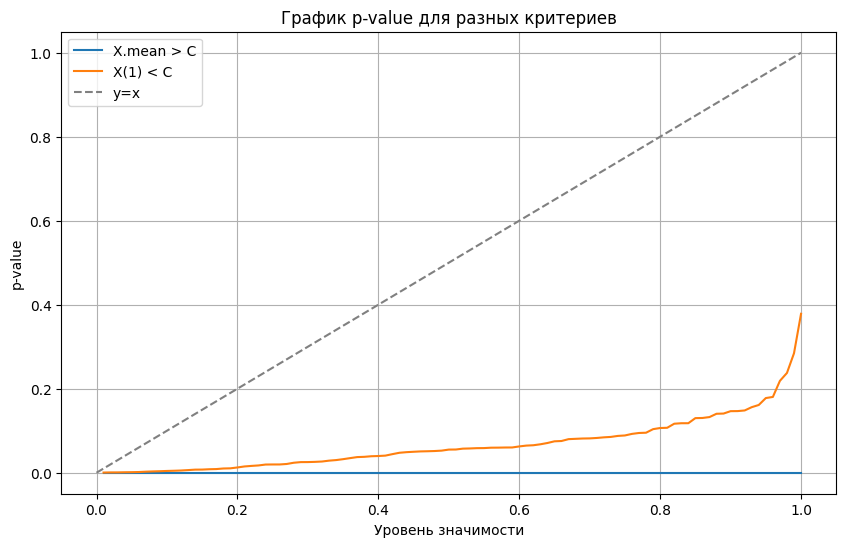

In [8]:
#2.3
theta0 = 2
theta1 = 5
n = 30
m = 100

# Генерируем выборки и находим статистики T
samples = expon.rvs(scale=theta1, size=(m, n))
T_mean = np.mean(samples, axis=1)
T_min = np.min(samples, axis=1)

# Вычисляем p-value
p_values_mean = np.array([1 - expon.cdf(T, scale=theta0/n) for T in T_mean])
p_values_min = np.array([expon.cdf(T, scale=theta0) for T in T_min])

# Упорядочиваем p-values
p_values_mean_sorted = np.sort(p_values_mean)
p_values_min_sorted = np.sort(p_values_min)

# Построение графика p-value
plt.figure(figsize=(10, 6))

plt.plot(np.arange(1, m+1) / m, p_values_mean_sorted, label='X.mean > C')
plt.plot(np.arange(1, m+1) / m, p_values_min_sorted, label='X(1) < C')

# График для сравнения с прямой y=x
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle='--', color='gray', label='y=x')

plt.xlabel('Уровень значимости')
plt.ylabel('p-value')
plt.title('График p-value для разных критериев')
plt.legend()
plt.grid(True)
plt.show()


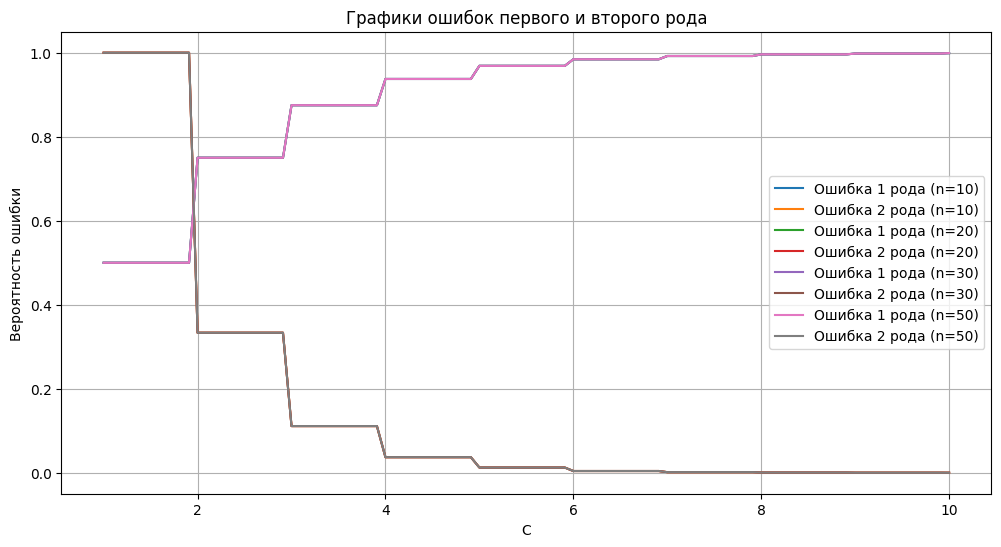

In [10]:
#2.4
# Параметры
theta0 = 1/2
theta1 = 2/3
n_values = [10, 20, 30, 50]  # Размеры выборки
C_values = np.linspace(1, 10, 100)

# Ошибки первого и второго рода для разных n и C
alpha_values = np.zeros((len(n_values), len(C_values)))
beta_values = np.zeros((len(n_values), len(C_values)))

for i, n in enumerate(n_values):
    for j, C in enumerate(C_values):
        alpha_values[i, j] = geom.cdf(C, theta0)
        beta_values[i, j] = 1 - geom.cdf(C - 1, theta1)

# Построение графиков ошибок
plt.figure(figsize=(12, 6))

for i, n in enumerate(n_values):
    plt.plot(C_values, alpha_values[i], label=f'Ошибка 1 рода (n={n})')
    plt.plot(C_values, beta_values[i], label=f'Ошибка 2 рода (n={n})')

plt.xlabel('C')
plt.ylabel('Вероятность ошибки')
plt.title('Графики ошибок первого и второго рода')
plt.legend()
plt.grid(True)
plt.show()

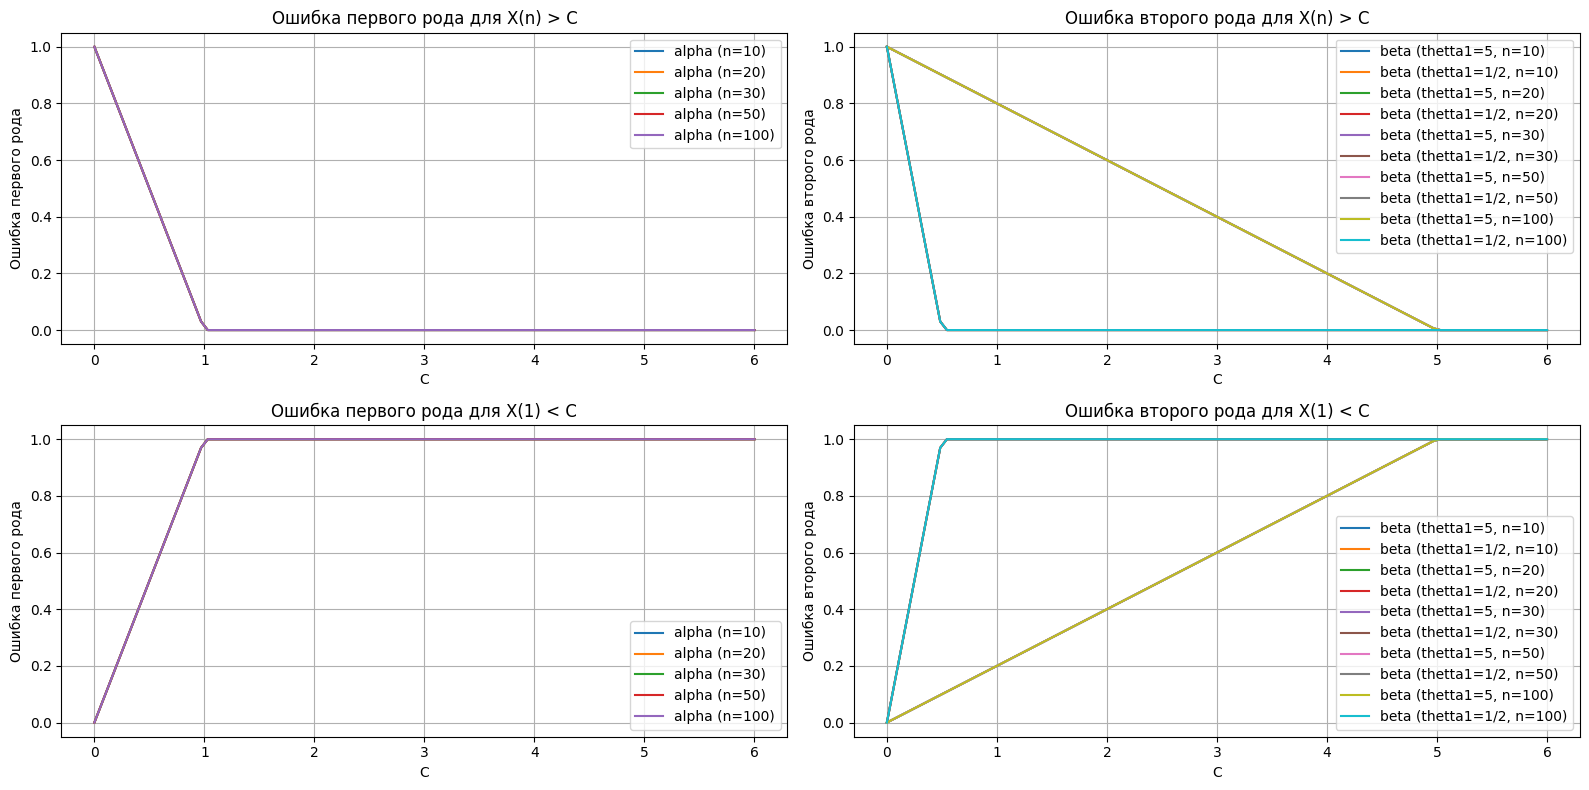

In [12]:
#3.1
# Параметры
theta0 = 1
theta1_values = [5, 1/2]
n_values = [10, 20, 30, 50, 100]  # Размеры выборки
C_values = np.linspace(0, 6, 100)

# Ошибки первого и второго рода для разных n и C
alpha_values_max = np.zeros((len(n_values), len(C_values)))
beta_values_max_5 = np.zeros((len(n_values), len(C_values)))
beta_values_max_half = np.zeros((len(n_values), len(C_values)))

alpha_values_min = np.zeros((len(n_values), len(C_values)))
beta_values_min_5 = np.zeros((len(n_values), len(C_values)))
beta_values_min_half = np.zeros((len(n_values), len(C_values)))

for i, n in enumerate(n_values):
    for j, C in enumerate(C_values):
        alpha_values_max[i, j] = 1 - uniform.cdf(C, scale=theta0)
        beta_values_max_5[i, j] = 1 - uniform.cdf(C, scale=theta1_values[0])
        beta_values_max_half[i, j] = 1 - uniform.cdf(C, scale=theta1_values[1])

        alpha_values_min[i, j] = uniform.cdf(C, scale=theta0)
        beta_values_min_5[i, j] = uniform.cdf(C, scale=theta1_values[0])
        beta_values_min_half[i, j] = uniform.cdf(C, scale=theta1_values[1])

# Построение графиков ошибок
plt.figure(figsize=(16, 8))

# Ошибки первого и второго рода для {X(n) > C}
plt.subplot(2, 2, 1)
for i, n in enumerate(n_values):
    plt.plot(C_values, alpha_values_max[i], label=f'alpha (n={n})')
plt.xlabel('C')
plt.ylabel('Ошибка первого рода')
plt.title('Ошибка первого рода для X(n) > C')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for i, n in enumerate(n_values):
    plt.plot(C_values, beta_values_max_5[i], label=f'beta (thetta1=5, n={n})')
    plt.plot(C_values, beta_values_max_half[i], label=f'beta (thetta1=1/2, n={n})')
plt.xlabel('C')
plt.ylabel('Ошибка второго рода')
plt.title('Ошибка второго рода для X(n) > C')
plt.legend()
plt.grid(True)

# Ошибки первого и второго рода для {X(1) < C}
plt.subplot(2, 2, 3)
for i, n in enumerate(n_values):
    plt.plot(C_values, alpha_values_min[i], label=f'alpha (n={n})')
plt.xlabel('C')
plt.ylabel('Ошибка первого рода')
plt.title('Ошибка первого рода для X(1) < C')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
for i, n in enumerate(n_values):
    plt.plot(C_values, beta_values_min_5[i], label=f'beta (thetta1=5, n={n})')
    plt.plot(C_values, beta_values_min_half[i], label=f'beta (thetta1=1/2, n={n})')
plt.xlabel('C')
plt.ylabel('Ошибка второго рода')
plt.title('Ошибка второго рода для X(1) < C')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

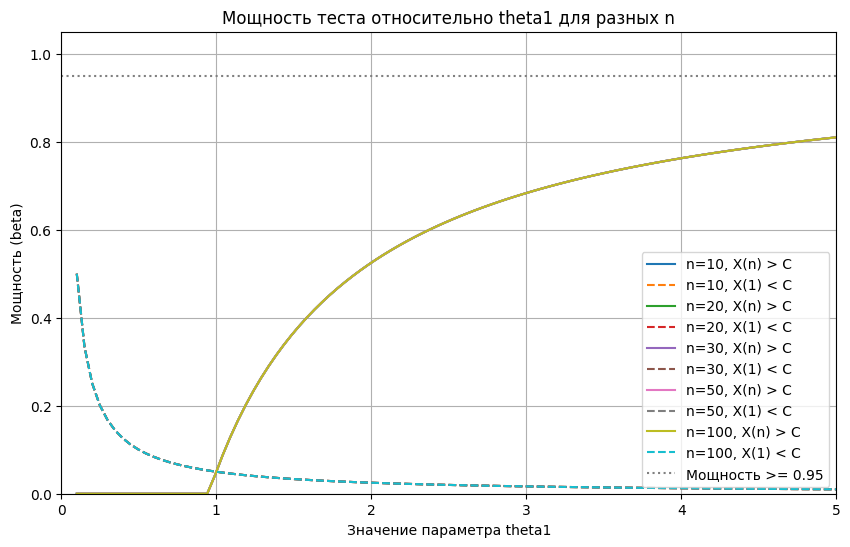

In [13]:
#3.2
# Находим значение C для alpha=0.05
alpha = 0.05
C_max_alpha = uniform.ppf(1 - alpha, loc=0, scale=1)
C_min_alpha = uniform.ppf(alpha, loc=0, scale=1)

# Параметры
n_values = [10, 20, 30, 50, 100]  # Размеры выборки
theta1_range = np.linspace(0.1, 5, 100)

# Мощности для критериев {X(n) > C} и {X(1) < C}
power_max = np.zeros((len(n_values), len(theta1_range)))
power_min = np.zeros((len(n_values), len(theta1_range)))

for i, n in enumerate(n_values):
    for j, theta1 in enumerate(theta1_range):
        power_max[i, j] = 1 - uniform.cdf(C_max_alpha, loc=0, scale=theta1)
        power_min[i, j] = uniform.cdf(C_min_alpha, loc=0, scale=theta1)

# Построение графиков мощности
plt.figure(figsize=(10, 6))

for i, n in enumerate(n_values):
    plt.plot(theta1_range, power_max[i], label=f'n={n}, X(n) > C', linestyle='-')
    plt.plot(theta1_range, power_min[i], label=f'n={n}, X(1) < C', linestyle='--')

plt.axhline(y=0.95, color='gray', linestyle=':', label='Мощность >= 0.95')
plt.xlabel('Значение параметра theta1')
plt.ylabel('Мощность (beta)')
plt.title('Мощность теста относительно theta1 для разных n')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.05)
plt.xlim(0, 5)
plt.show()

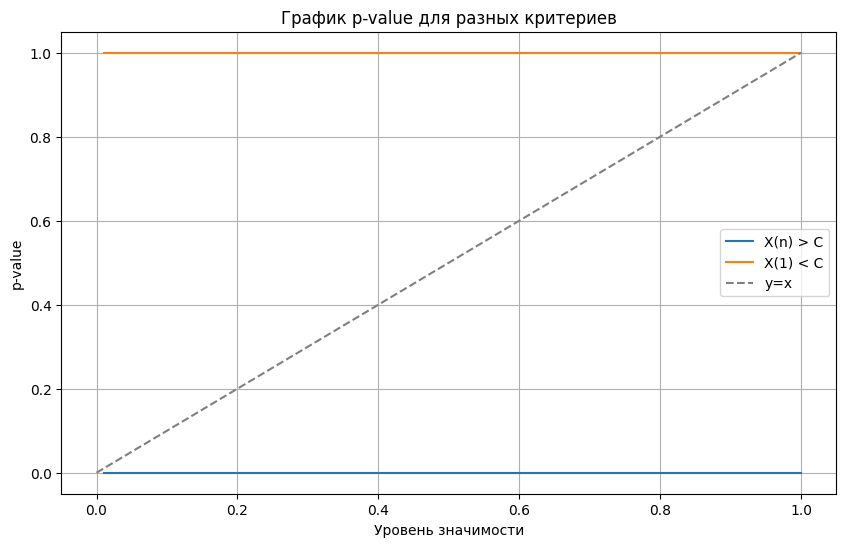

In [14]:
#3.3
# Параметры
theta0 = 1
theta1 = 5
n = 30
m = 100

# Генерируем выборку и находим значение статистики критерия T
samples = uniform.rvs(scale=theta1, size=(m, n))
T = np.max(samples, axis=1)

# Вычисляем p-value
p_values_max = 1 - uniform.cdf(T, scale=theta0)
p_values_min = uniform.cdf(T, scale=theta0)

# Упорядочиваем p-values
p_values_max_sorted = np.sort(p_values_max)
p_values_min_sorted = np.sort(p_values_min)

# Построение графика p-value
plt.figure(figsize=(10, 6))

plt.plot(np.arange(1, m+1) / m, p_values_max_sorted, label='X(n) > C')
plt.plot(np.arange(1, m+1) / m, p_values_min_sorted, label='X(1) < C')

# График для сравнения с прямой y=x
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle='--', color='gray', label='y=x')

plt.xlabel('Уровень значимости')
plt.ylabel('p-value')
plt.title('График p-value для разных критериев')
plt.legend()
plt.grid(True)
plt.show()

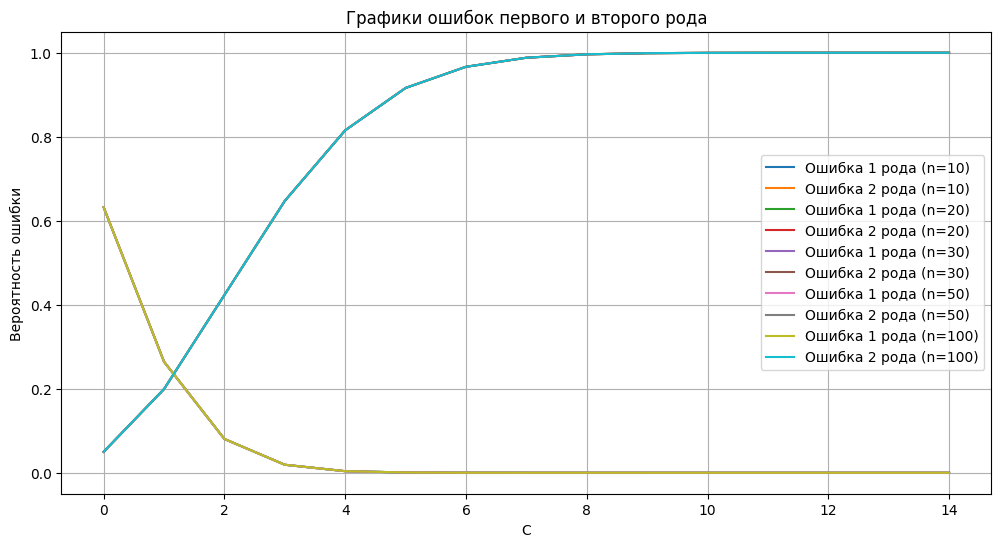

In [18]:
#3.4
# Параметры
theta0 = 1
theta1 = 3
n_values = [10, 20, 30, 50, 100]  # Размеры выборки
C_values = np.arange(0, 15)

# Ошибки первого и второго рода для разных n и C
alpha_values = np.zeros((len(n_values), len(C_values)))
beta_values = np.zeros((len(n_values), len(C_values)))

for i, n in enumerate(n_values):
    for j, C in enumerate(C_values):
        alpha_values[i, j] = 1 - poisson.cdf(C, mu=theta0)
        beta_values[i, j] = poisson.cdf(C, mu=theta1)

# Построение графиков ошибок
plt.figure(figsize=(12, 6))

for i, n in enumerate(n_values):
    plt.plot(C_values, alpha_values[i], label=f'Ошибка 1 рода (n={n})')
    plt.plot(C_values, beta_values[i], label=f'Ошибка 2 рода (n={n})')

plt.xlabel('C')
plt.ylabel('Вероятность ошибки')
plt.title('Графики ошибок первого и второго рода')
plt.legend()
plt.grid(True)
plt.show()

